##Imports and Conection with GDrive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/MyDrive/')
# método em Python usado para alterar o diretório de trabalho atual para o caminho especificado.
path = "/content/drive/MyDrive/Iniciacao_cientifica/"
os.chdir(path)
import shutil
shutil.copy('/content/drive/MyDrive/Iniciacao_cientifica/MLCQ_PMD_Organic_Designite_CKclass_CKmethod_agglomeration_Complete.csv', '/content/')

Mounted at /content/drive


'/content/MLCQ_PMD_Organic_Designite_CKclass_CKmethod_agglomeration_Complete.csv'

##Read Dataset csv as dataframe

In [ ]:
# Carregando o arquivo CSV
df = pd.read_csv('/content/MLCQ_PMD_Organic_Designite_CKclass_CKmethod_agglomeration_Complete.csv')

<ipython-input-3-c4ce41d60e54>:2: DtypeWarning: Columns (72,73,74,75,76,157) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/MLCQ_PMD_Organic_Designite_CKclass_CKmethod_agglomeration_Complete.csv')


##Standardize column and fields names

In [ ]:
#Rename columns smells for graphic
df = df.rename(columns={'Organic_smellName':'smell_Organic', 'PMD_Rule':'smell_PMD' })

#join two columns about smell types in Designite
df['smell_Designite'] = df[['Designite_implementation Smell', 'Designite_Design Smell']].stack().groupby(level=0).agg(','.join)

df['smell_Designite'][df['smell_Designite']=='Feature Envy'] = 'featureenvy'

<ipython-input-4-c5dfbd196bfc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smell_Designite'][df['smell_Designite']=='Feature Envy'] = 'featureenvy'


##Create has agglomeration columns and number of aglomeration for the automatic tools

In [ ]:
# aglomeration (consider any smell)
list_system = ['smell_Organic', 'smell_PMD', 'smell_Designite']
# replace ',' in 'smell_Designite' for ' ' (space) to count the number of smells (aglomeration)
df['smell_Designite'] = df['smell_Designite'].replace(',', ' ', regex=True)

for s in list_system:

  globals()[f'{s}_aglomeration'] = []
  globals()[f'{s}_num_aglomeration'] = []

  for i in df.index:

    if (type(df[s][i]) != float) and (len(df[s][i].split()) != 1) :
        globals()[f'{s}_aglomeration'].append(1)
        globals()[f'{s}_num_aglomeration'].append(len(df[s][i].split()))
    else :
      globals()[f'{s}_aglomeration'].append(0)
      if (type(df[s][i]) != float):
        globals()[f'{s}_num_aglomeration'].append(1)
      else:
        globals()[f'{s}_num_aglomeration'].append(0)

df['smell_Organic_aglomeration'] = smell_Organic_aglomeration
df['smell_PMD_aglomeration'] = smell_PMD_aglomeration
df['smell_Designite_aglomeration'] = smell_Designite_aglomeration

df['smell_Organic_num_aglomeration'] = smell_Organic_num_aglomeration
df['smell_PMD_num_aglomeration'] = smell_PMD_num_aglomeration
df['smell_Designite_num_aglomeration'] = smell_Designite_num_aglomeration


##Create new columns with the agreement between the manual and automatic labeling

In [ ]:
#Agreement
list_system = ['smell_Organic', 'smell_PMD', 'smell_Designite']

for s in list_system:

  globals()[f'{s}_longmethod'] = []
  globals()[f'{s}_featureenvy'] = []
  globals()[f'{s}_dataclass'] = []
  globals()[f'{s}_blob'] = []

  for i in df.index:
    if (type(df[s][i]) != float) :
      if (((df[s][i]) == ('longmethod')) or ('longmethod' in (df[s][i]))) and (df['longmethod_label'][i] == 1) :
        globals()[f'{s}_longmethod'].append(1)
      else :
        globals()[f'{s}_longmethod'].append(0)
      if (((df[s][i]) == ('featureenvy'))  or 'featureenvy' in (df[s][i])) and (df['featureenvy_label'][i] == 1) :
        globals()[f'{s}_featureenvy'].append(1)
      else :
        globals()[f'{s}_featureenvy'].append(0)
      if (((df[s][i]) == ('dataclass')) or 'dataclass' in (df[s][i])) and (df['dataclass_label'][i] == 1) :
        globals()[f'{s}_dataclass'].append(1)
      else :
        globals()[f'{s}_dataclass'].append(0)
      if (((df[s][i]) == ('blob')) or 'blob' in (df[s][i])) and (df['blob_label'][i] == 1) :
        globals()[f'{s}_blob'].append(1)
      else :
        globals()[f'{s}_blob'].append(0)
    else :
      globals()[f'{s}_longmethod'].append(0)
      globals()[f'{s}_featureenvy'].append(0)
      globals()[f'{s}_dataclass'].append(0)
      globals()[f'{s}_blob'].append(0)

df['smell_Organic_longmethod'] = smell_Organic_longmethod
df['smell_Organic_featureenvy'] = smell_Organic_featureenvy
df['smell_Organic_dataclass'] = smell_Organic_dataclass
df['smell_Organic_blob'] = smell_Organic_blob

df['smell_PMD_longmethod'] = smell_PMD_longmethod
df['smell_PMD_featureenvy'] = smell_PMD_featureenvy
df['smell_PMD_dataclass'] = smell_PMD_dataclass
df['smell_PMD_blob'] = smell_PMD_blob

df['smell_Designite_longmethod'] = smell_Designite_longmethod
df['smell_Designite_featureenvy'] = smell_Designite_featureenvy
df['smell_Designite_dataclass'] = smell_Designite_dataclass
df['smell_Designite_blob'] = smell_Designite_blob

##Convert columns 'reviewer_id' and 'severity' to list
>> for 'severity' convert the fields to list of strings

In [ ]:
list_reviwer_id = []

# iterate through each row and select 'reviewer_id' column.
for i in df.index:
    # Converting string to list
    id_list = ast.literal_eval(df['reviewer_id'][i])
    list_reviwer_id.append(id_list)

df['reviewer_id'] = list_reviwer_id

In [ ]:
list_severity = []
# iterate through each row and select 'reviewer_id' column.
for i in df.index:
    # Converting string to list
    if (type(df['reviewer_id'][i]) != int):

      # Converting string to list
      id_severity = df['severity'][i].strip('][').split(', ')
      list_severity.append(id_severity)
    else:
      list_severity.append(df['severity'][i])

df['severity'] = list_severity

In [ ]:
list_severity = []
# iterate through each row and select 'reviewer_id' column.
for i in df.index:
    l_severity = []
    if (type(df['reviewer_id'][i]) != int) and (len(df['reviewer_id'][i]) != len(df['severity'][i])):
        severity = df['severity'][i][0]
        for j in (df['reviewer_id'][i]):
          l_severity.append(severity)
    else:
      l_severity = df['severity'][i]
    list_severity.append(l_severity)

df['severity'] = list_severity

##Map the list in column A to the list in column C adding new rows in the dataframe

In [ ]:
df = df.rename(columns={'reviewer_id': 'A', 'severity': 'C'})
df_result = df.explode(list('AC'))
df_result.head(30)

df_result = df_result.rename(columns={'A':'reviewer_id', 'C':'severity'})

##Adicionar info in dataframe (new column) about background of the expert ('reviewer_id')

In [ ]:
#Background dos experts from MLCQ/MLCQCodeSmellDevelopersSurvey

groups = {
    23: 'Middle', 6: 'Junior', 15: 'Junior', 25: 'Senior', 7: 'Junior',
    8: 'Junior', 9: 'Junior', 15: 'Junior', 5: 'Middle',
    3: 'Senior', 14: 'Senior', 10: 'Senior', 12: 'Senior', 4: 'Senior',
    20: 'Senior', 11: 'Middle', 17: 'Senior', 16: 'Middle', 22: 'Middle'
}

df_result['background'] = df_result['reviewer_id'].map(groups)
df_result['severity'] = df_result['severity'].replace('\'', '', regex=True)

#save file with all preprocessing
df_result.to_csv('/content/drive/MyDrive/Iniciacao_cientifica/out.csv')
df_result.columns.values

array(['commit_hash', 'start_line', 'end_line', 'smell', 'id',
       'reviewer_id', 'sample_id', 'severity', 'longmethod_label',
       'featureenvy_label', 'dataclass_label', 'blob_label',
       'agreement_experts', 'agreement_smell_type', 'agreement_smell',
       'system_name', 'review_timestamp', 'type', 'code_name',
       'repository', 'path', 'link', 'is_from_industry_relevant_project',
       'weighted_average', 'qtd_rewier_id', 'Organic_fileRelativePath',
       'Organic_startLine', 'Organic_endLine', 'Organic_WeighOfClass',
       'Organic_NumberOfAccessorMethods',
       'Organic_ClassEffectiveLinesOfCode', 'Organic_LCOM3',
       'Organic_TightClassCohesion', 'Organic_IsAbstract',
       'Organic_PublicFieldCount', 'Organic_OverrideRatio',
       'Organic_WeightedMethodCount', 'smell_Organic',
       'Organic_smellReason', 'Organic_ChangingMethods',
       'Organic_NumberOfTryStatements', 'Organic_MaxNesting',
       'Organic_NumberOfFinallyStatements',
       'Organic_Nu

In [ ]:
df_graph = df_result[['background', 'longmethod_label', 'featureenvy_label', 'dataclass_label', 'blob_label',
  'smell_Organic_longmethod', 'smell_Organic_featureenvy', 'smell_Organic_dataclass', 'smell_Organic_blob',
  'smell_PMD_longmethod', 'smell_PMD_featureenvy', 'smell_PMD_dataclass', 'smell_PMD_blob',
  'smell_Designite_longmethod', 'smell_Designite_featureenvy', 'smell_Designite_dataclass', 'smell_Designite_blob']]
df_graph = df_graph.groupby(['background'], dropna=False).sum()
df_graph

#df_graph.groupby(['background'], dropna=False).value_counts()
#14723

,longmethod_label,featureenvy_label,dataclass_label,blob_label,smell_Organic_longmethod,smell_Organic_featureenvy,smell_Organic_dataclass,smell_Organic_blob,smell_PMD_longmethod,smell_PMD_featureenvy,smell_PMD_dataclass,smell_PMD_blob,smell_Designite_longmethod,smell_Designite_featureenvy,smell_Designite_dataclass,smell_Designite_blob
background,,,,,,,,,,,,,,,,
Junior,56,84,149,137,3,5,2,4,4,0,21,28,6,0,0,0
Middle,125,108,185,250,23,5,14,13,7,0,28,25,16,0,0,0
Senior,746,682,1173,1247,83,42,39,94,26,0,122,214,66,0,0,0
NaN,243,257,515,493,14,13,25,29,8,0,56,83,26,0,0,0


In [ ]:
# Calculating Percentage
def ComputePercent(df_graph):
  tool = ['Organic', 'PMD', 'Designite']
  smell = ['longmethod', 'featureenvy', 'dataclass', 'blob']

  for i in tool:
    for j in smell:
      df_graph['smell_'+i+'_'+j+''] = round((df_graph['smell_'+i+'_'+j+''] * 100) / df_graph[''+j+'_label'])

ComputePercent(df_graph)
df_graph = df_graph[['smell_Organic_longmethod', 'smell_Organic_featureenvy', 'smell_Organic_dataclass', 'smell_Organic_blob',
  'smell_PMD_longmethod', 'smell_PMD_dataclass', 'smell_PMD_blob',
  'smell_Designite_longmethod', 'smell_Designite_featureenvy']]
df_graph = df_graph.T
df_graph.reset_index(inplace=True)
df_graph.head(5)

background,index,Junior,Middle,Senior,NaN
0,smell_Organic_longmethod,5.0,18.0,11.0,6.0
1,smell_Organic_featureenvy,6.0,5.0,6.0,5.0
2,smell_Organic_dataclass,1.0,8.0,3.0,5.0
3,smell_Organic_blob,3.0,5.0,8.0,6.0
4,smell_PMD_longmethod,7.0,6.0,3.0,3.0


## Background X Agreement Smells Types

Analyze codesmell detection from developers' background

While analyzing experts' backgrounds, a hypothesis is that the more experienced an expert is, the higher the agreement of the manual labeling with the automatic labeling.



Text(0.5, 1.0, 'Code smell per tool and background')

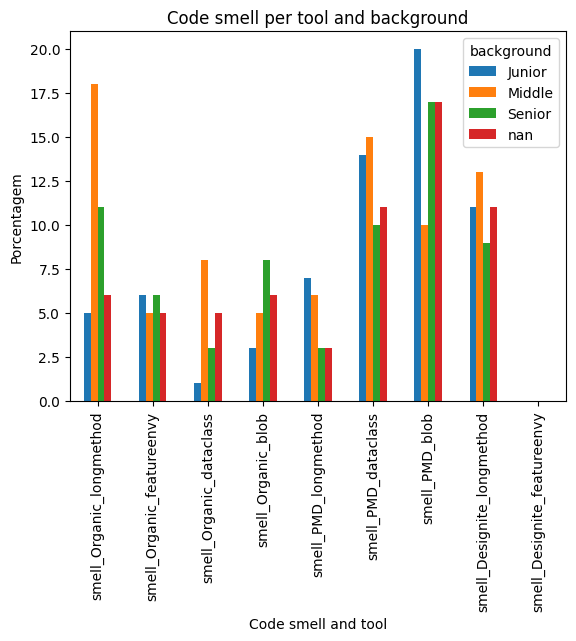

In [ ]:
ax = df_graph.plot(x='index', kind='bar', stacked=False,
        title='Stacked Bar Graph by dataframe')
#ax = df_graph.plot(x='index', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

ax.set_xlabel("Code smell and tool")
ax.set_ylabel("Porcentagem")
ax.set_title("Code smell per tool and background")


## Severity X Agreement Smells Types

In [ ]:
df_severity = df_result[['severity', 'longmethod_label', 'featureenvy_label', 'dataclass_label', 'blob_label',
  'smell_Organic_longmethod', 'smell_Organic_featureenvy', 'smell_Organic_dataclass', 'smell_Organic_blob',
  'smell_PMD_longmethod', 'smell_PMD_featureenvy', 'smell_PMD_dataclass', 'smell_PMD_blob',
  'smell_Designite_longmethod', 'smell_Designite_featureenvy', 'smell_Designite_dataclass', 'smell_Designite_blob']]
#df_severity['severity'] = df_severity['severity'].replace('\'', '', regex=True)
df_severity = df_severity.groupby(['severity'], dropna=False).sum()
df_severity.head(30)

,longmethod_label,featureenvy_label,dataclass_label,blob_label,smell_Organic_longmethod,smell_Organic_featureenvy,smell_Organic_dataclass,smell_Organic_blob,smell_PMD_longmethod,smell_PMD_featureenvy,smell_PMD_dataclass,smell_PMD_blob,smell_Designite_longmethod,smell_Designite_featureenvy,smell_Designite_dataclass,smell_Designite_blob
severity,,,,,,,,,,,,,,,,
critical,93,28,188,178,9,3,14,20,25,0,51,83,13,0,0,0
major,329,154,477,399,66,8,26,39,18,0,89,103,48,0,0,0
minor,528,321,641,730,45,18,30,45,0,0,51,84,38,0,0,0
none,220,628,716,820,3,36,10,36,2,0,36,80,15,0,0,0


In [ ]:
# Calculating Percentage
ComputePercent(df_severity)
df_severity = df_severity[['smell_Organic_longmethod', 'smell_Organic_featureenvy', 'smell_Organic_dataclass', 'smell_Organic_blob',
  'smell_PMD_longmethod', 'smell_PMD_dataclass', 'smell_PMD_blob',
  'smell_Designite_longmethod', 'smell_Designite_featureenvy']]
df_severity = df_severity.T
df_severity.reset_index(inplace=True)
df_severity

severity,index,critical,major,minor,none
0,smell_Organic_longmethod,10.0,20.0,9.0,1.0
1,smell_Organic_featureenvy,11.0,5.0,6.0,6.0
2,smell_Organic_dataclass,7.0,5.0,5.0,1.0
3,smell_Organic_blob,11.0,10.0,6.0,4.0
4,smell_PMD_longmethod,27.0,5.0,0.0,1.0
5,smell_PMD_dataclass,27.0,19.0,8.0,5.0
6,smell_PMD_blob,47.0,26.0,12.0,10.0
7,smell_Designite_longmethod,14.0,15.0,7.0,7.0
8,smell_Designite_featureenvy,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Code smell per tool and severity')

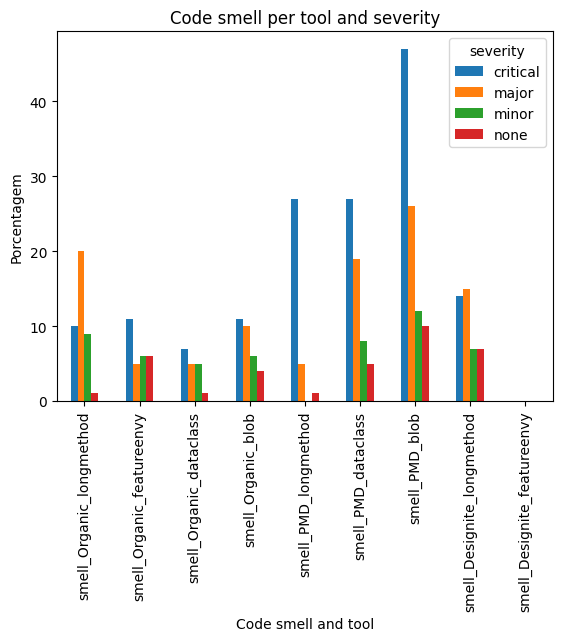

In [ ]:
ax = df_severity.plot(x='index', kind='bar', stacked=False,
        title='Stacked Bar Graph by dataframe')
#ax = df_graph.plot(x='index', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

ax.set_xlabel("Code smell and tool")
ax.set_ylabel("Porcentagem")
ax.set_title("Code smell per tool and severity")

##Tool vs agreement has smell


In [ ]:
df_agglomeration = pd.DataFrame()

df_agglomeration['Aglomeration'] = ['MLCQ', 'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']

df_hasSmell = df_result[['longmethod_label', #'featureenvy_label', 'dataclass_label', 'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["longmethod_label"] == 1)]
df_agglomeration['longmethod'] = df_hasSmell.sum().values

df_hasSmell = df_result[['featureenvy_label', #'dataclass_label', 'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["featureenvy_label"] == 1)]
df_agglomeration['featureenvy'] = df_hasSmell.sum().values

df_hasSmell = df_result[['dataclass_label', #'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["dataclass_label"] == 1)]
df_agglomeration['dataclass'] = df_hasSmell.sum().values

df_hasSmell = df_result[['blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["blob_label"] == 1)]
df_agglomeration['blob'] = df_hasSmell.sum().values

# set the 'Aglomeration' column as index
df_agglomeration.set_index('Aglomeration', inplace=True)
df_agglomeration = df_agglomeration.T
df_agglomeration




Aglomeration,MLCQ,smell_Organic_aglomeration,smell_PMD_aglomeration,smell_Designite_aglomeration
longmethod,1170,74,246,569
featureenvy,1131,53,127,506
dataclass,2022,50,606,1288
blob,2127,86,1003,1344


In [ ]:
# Calculating Percentage
tool = ['Organic', 'PMD', 'Designite']
for i in tool:
  df_agglomeration['smell_'+i+'_aglomeration'] = round((df_agglomeration['smell_'+i+'_aglomeration'] * 100) / df_agglomeration['MLCQ'])

df_agglomeration = df_agglomeration[['smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_agglomeration = df_agglomeration.T
df_agglomeration.reset_index(inplace=True)
df_agglomeration


,Aglomeration,longmethod,featureenvy,dataclass,blob
0,smell_Organic_aglomeration,6.0,5.0,2.0,4.0
1,smell_PMD_aglomeration,21.0,11.0,30.0,47.0
2,smell_Designite_aglomeration,49.0,45.0,64.0,63.0


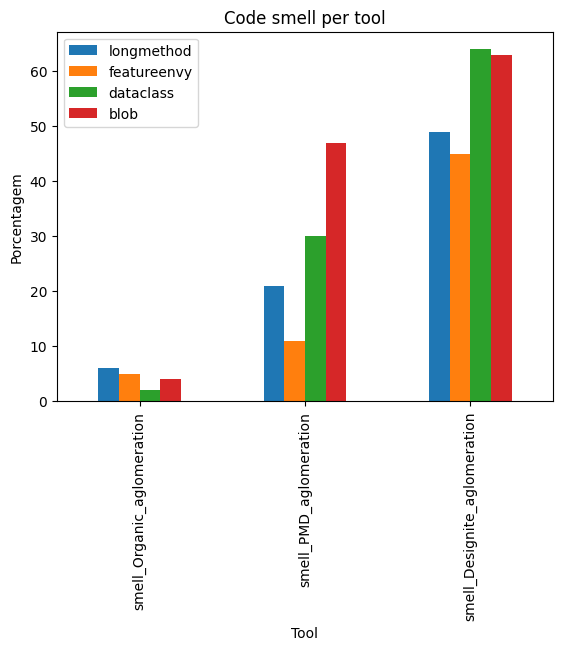

In [ ]:
ax = df_agglomeration.plot(x='Aglomeration', kind='bar', stacked=False,
        title='Stacked Bar Graph by dataframe')
#ax = df_graph.plot(x='index', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

ax.set_xlabel("Tool")
ax.set_ylabel("Porcentagem")
ax.set_title("Code smell per tool")